# Исследование продаж компьютерных игр.

В данном проекте нам из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Описание данных

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  

Данные за 2016 год могут быть неполными.

## План выполнения проекта

**Шаг 1.** Изучение общей информации в имеющемся файле.

**Шаг 2.** Подготовка данных для анализа.   

**Шаг 3.** Исследовательский анализ данных:
  1. Изучение количества выпущенных игр по годам;
  2. Анализ продаж игр на разных платформах за все время;
  3. Определение периода, по которому можно построить прогноз на 2017 год;
  4. Анализ платформ и выбор наиоблее перспективных;
  5. Есть ли разница продаж каждой игры на разных платформах?
  6. Как влияют отзывы пользователей и критиков на продажи?
  7. Анализ прибыльности разных жанров. 
             
**Шаг 4.** Составление портрета пользователя каждого региона.  
Определение для пользователя каждого региона (NA, EU, JP):
  1. Топ-5 самых популярных платформ;
  2. Топ-5 самых популярных жанров;
  3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?  

**Шаг 5.** Проверка гипотез  
  1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
  2. Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.  

**Шаг 6.** Общий вывод

***
## Шаг 1. Изучение общей информации в имеющемся файле.

In [1]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
import math

large = 22; med = 14; small = 12
params = {'axes.titlesize': med,
          'legend.fontsize': med,
          'figure.figsize': (12, 8),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': med}
plt.rcParams.update(params)

%matplotlib inline

games = pd.read_csv('/datasets/games.csv')

In [2]:
games.info()
games.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Вывод

В таблице 11 столбцов в основном форматов object И float64. Необходимо менить форматы столбцов Year_of_Release User_Score.  
В таблице 16715 строк. Данные по продажам присутствуют во всех строках.  
Есть небольшое количество пропусков в столбце Year_of_Release - скорее всего достаточно случайны, попробуем заполнить их данными  других платформ.  
Очень много пропусков в столбцах Critic_Score, User_Score и Rating - предполагаем, что пропуски могут быть связаны с возрастом игр (в момент выхода еще не было актуальных рейтингов) или их новизной или неизвестностью (рейтинг не сформирован в связи с небольшими продажами).

***
## Шаг 2. Подготовка данных для анализа.

***1. Приведем названия столбцов к нижнему регистру.***

In [3]:
new_names = games.columns.str.lower()
games.set_axis(new_names, axis = 'columns', inplace = True)
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

*Добавим столбец total_sales*

In [4]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

***  

***2. Обработаем пропущенные значения***

*Посмотрим в каких колонках пропущено много значений*

In [5]:
(games.isnull().sum()/games.shape[0]*100).sort_values(ascending = False)

critic_score       51.319174
rating             40.478612
user_score         40.089740
year_of_release     1.609333
genre               0.011965
name                0.011965
total_sales         0.000000
other_sales         0.000000
jp_sales            0.000000
eu_sales            0.000000
na_sales            0.000000
platform            0.000000
dtype: float64

Пропуски в столбцах name и genre можно удалить в связи с очень маленьким количеством и явно случайным появлением.  

Пропуски в столбце year_of_release нужно изучить и потарать обработать, при необходимости удалить.  

Столбцы critic_score, user_score, rating содержат в себе очень большое количество пропущенных данных - более 40%.  
Предположим, что основной причиной является большой возраст игр, т.е. актуальные рейтинги еще не велись, а для столбцов critic_score, user_score еще и небольшие продажи некоторых игр, что привело к отсутсвию достаточного для формирования рейтинга количества оценок.

***
*Обработка пропусков в имени и жанре игр*

In [6]:
print('Количество пропусков в столбце name:', games['name'].isna().sum())
games['name'] = games['name'].fillna('NaN')
games = games.query('name != "NaN"')
games.info()

Количество пропусков в столбце name: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
total_sales        16713 non-null float64
dtypes: float64(7), object(5)
memory usage: 1.7+ MB


Пропусков в столбце с названиями игр оказалось всего 2. После их удаления, пропуски в столбце с названием жанра также удалились.

***
***Обработка пропусков в столбце year_of_release***

Проанализировав таблицу видим, что в ней присутствуют данные по играм, выпущенным для разных платформ.  
Предположим, что игры для разных платформ выхоядт одновременно и попробуем заполнить пропуски года выпуска на основании данных с других платформ.

In [7]:
games[games['name'] == 'Madden NFL 11'].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
561,Madden NFL 11,X360,2010.0,Sports,2.38,0.12,0.0,0.18,84.0,5.7,E,2.68
661,Madden NFL 11,PS3,2010.0,Sports,2.04,0.15,0.0,0.20,83.0,6.1,E,2.39
2849,Madden NFL 11,Wii,NaN,Sports,0.68,0.00,0.0,0.04,75.0,5.4,E,0.72
3987,Madden NFL 11,PS2,2010.0,Sports,0.41,0.02,0.0,0.07,NaN,7,E,0.50
5049,Madden NFL 11,PSP,2010.0,Sports,0.35,0.00,0.0,0.03,NaN,tbd,E,0.38


In [8]:
games['year_of_release'] = games.groupby('name')['year_of_release'].transform(lambda x: x.fillna(x.median(skipna=True)))

In [9]:
games.loc[474:476]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
474,Dragon Ball Z: Budokai Tenkaichi 3,PS2,2007.0,Fighting,1.15,0.00,0.76,1.09,73.0,9.2,T,3.00
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,3.00
476,Star Fox,SNES,1993.0,Shooter,1.61,0.51,0.80,0.07,NaN,NaN,NaN,2.99


In [10]:
len(games.query('year_of_release.isna()'))

146

In [11]:
games.year_of_release = games.year_of_release.fillna(0)
year = str([x for x in range (1980, 2018)])

def temp_func(row):
    yrow = row['year_of_release']
    nrow = row['name']
    if yrow == 0:
        sp_row = nrow.split(' ')
        for j in sp_row:
            if (j in year) and (len(j)==4):
                return int(j)        
    return yrow
    
games['year_of_release'] = games.apply(temp_func, axis = 1)

In [12]:
len(games.query('year_of_release == 0'))

139

В связи с небольшим количеством пустых значений, удалим их.

In [13]:
games = games.query('year_of_release != 0')
len(games.query('year_of_release.isna()'))

0

Также изменим тип столбца на int64

In [14]:
games['year_of_release'] = games.year_of_release.astype('int64')

***
***Обработка пропусков в столбце critic_score***

Посмотрим количество пропущенных значений в столбце critic_score

In [15]:
games.critic_score.value_counts(dropna=False).head()

NaN     8495
70.0     253
71.0     252
75.0     244
78.0     238
Name: critic_score, dtype: int64

Попробуем заменить пропуски медианной оценкой критиков той же игры, выпущенной для другой платформы.

In [16]:
games['critic_score'] = games.groupby('name')['critic_score'].transform(lambda x: x.fillna(x.median(skipna=True)))

In [17]:
games.critic_score.value_counts(dropna=False).head()

NaN     7535
70.0     276
71.0     268
75.0     266
73.0     264
Name: critic_score, dtype: int64

Таким способом удалось заполнить данные почти в 1000 строк, но общее количество пропусков все равно остается очень большим.  
Не будем их заменять. Создадим столбец с указанием отсутсвия рейтинга.

In [18]:
def critic(row):
    critic_rtn = row['critic_score']
    if critic_rtn > 0:
        return 1
    return 0
games['critic_id'] = games.apply(critic, axis=1) 
games['critic_id'].value_counts()

1    9039
0    7535
Name: critic_id, dtype: int64

***
***Обработка пропусков в столбце user_score***

Посмотрим количество пропущенных значений в столбце critic_score

In [19]:
games.user_score.value_counts(dropna=False).head()

NaN    6636
tbd    2395
7.8     324
8       288
8.2     279
Name: user_score, dtype: int64

Видим, что помимо пропущенных значений, есть значения tbd, которая означает, что рейтинг еще не сформирован из-за небольшого количества оценок пользователей.  
Значения tbd заменим на медианную оценку по жанру, предварительно заменив их на ноль.  
Пропущенные значения попробуем заменить медианной оценкой пользователей той же игры, выпущенной для другой платформы.

In [20]:
games['user_score'] = games['user_score'].replace('tbd', 0)
games['user_score'] = games.user_score.astype('float64')
games['user_score'] = games.groupby('genre')['user_score'].transform(lambda x: x.replace(0, x.median(skipna=True)))
games['user_score'] = games.groupby('name')['user_score'].transform(lambda x: x.fillna(x.median(skipna=True)))

In [21]:
games.user_score.value_counts(dropna=False).head()

NaN    6207
0.0     681
7.0     626
6.5     547
6.6     395
Name: user_score, dtype: int64

Таким способом удалось заполнить данные всего в 400 строках с пропущенными значениями и около 1700 значений tbd.  
При этом остались нулевые значения, это могло произойти из-за того, что в некоторых жанрах отсуствует рейтинг в принципе.
Проверим это.

In [22]:
games.groupby('genre')['user_score'].median(skipna=True).sort_values(ascending=False)

genre
Role-Playing    7.8
Strategy        7.6
Fighting        7.5
Shooter         7.3
Platform        7.1
Action          7.0
Racing          6.6
Sports          6.5
Adventure       6.3
Simulation      5.7
Puzzle          0.0
Misc            0.0
Name: user_score, dtype: float64

Видим, что в двух жанрах рейтинг отсутвует, поэтому удалять строки с нулевым рейтингом и пропущенные значения нельзя.  
Создадим столбец с указанием отсутствия рейтинга.

In [23]:
def user(row):
    user_rtn = row['user_score']
    if user_rtn > 0:
        return 1
    return 0
games['user_id'] = games.apply(user, axis=1) 
games['user_id'].value_counts()

1    9686
0    6888
Name: user_id, dtype: int64

***
***Обработка рейтинга ESRB***

Посмотрим на значения рейтинга.

In [24]:
games.rating.value_counts(dropna=False)

NaN     6703
E       3961
T       2930
M       1554
E10+    1412
EC         8
K-A        3
RP         2
AO         1
Name: rating, dtype: int64

Заменим значения 'K-A', 'EC', 'RP', 'AO' на 'E'

In [25]:
games.loc[games['rating'] == "K-A", 'rating'] = 'E'
games.loc[games['rating'] == "EC", 'rating'] = 'E'
games.loc[games['rating'] == "RP", 'rating'] = 'E'
games.loc[games['rating'] == "AO", 'rating'] = 'E'

In [26]:
games.rating.value_counts(dropna=False)

NaN     6703
E       3975
T       2930
M       1554
E10+    1412
Name: rating, dtype: int64

Пропуски принимаем решение не трогать. Заменим пропущенные значения тестом.

In [27]:
games.rating = games.rating.fillna('N/A')

***
***Для удобства поменяем столбцы в таблице местами***

In [28]:
neworder = ['name','platform','year_of_release','genre','na_sales',
            'eu_sales','jp_sales','other_sales','total_sales','critic_score',
           'critic_id','user_score','user_id','rating']
games=games.reindex(columns=neworder)

In [29]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,critic_id,user_score,user_id,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,1,8.0,1,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,NaN,0,NaN,0,N/A
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,1,8.3,1,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,1,8.0,1,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,NaN,0,NaN,0,N/A


***
## Шаг 3. Исследовательский анализ данных.

После предобработки данных проведем исследовательский анализ данных и постараемся дать ответы на следующие вопросы:
  1. Изучение количества выпущенных игр по годам;
  2. Анализ продаж игр на разных платформах за все время;
  3. Определение периода, по которому можно построить прогноз на 2017 год;
  4. Анализ платформ и выбор наиболее перспективных;
  5. Есть ли разница продаж каждой игры на разных платформах?
  6. Как влияют отзывы пользователей и критиков на продажи?
  7. Анализ прибыльности разных жанров. 

***
**1. Изучение количества выпущенных игр по годам**

*Построим график количества выпущенных игр по годам*

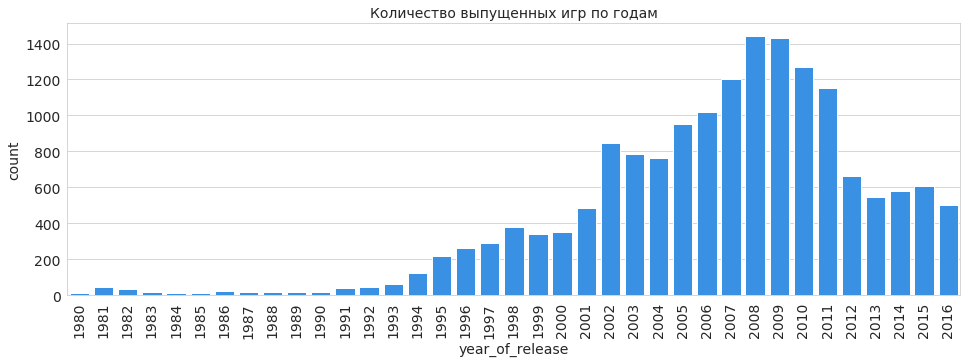

In [30]:
sns.set_style('whitegrid')
plt.figure(figsize=(16, 5))
sns.countplot(x='year_of_release', data = games, color = 'dodgerblue')
plt.title("Количество выпущенных игр по годам")
plt.xticks(rotation=90) 
plt.show()

**Вывод**

Из графика видим, что до 2008-2009 годов был резкий рост количества выпускаемых игр, после этого начался спад.  
Последние 5 лет количество выходящих на рынок игр находится примерно на одном уровне.  
Для составления прогноза на 2017 год будут актуальны данные, начиная с 2012 года.

***
**2. Анализ продаж игр на разных платформах за все время**

*В начале построим график распределения общих продаж по годам*

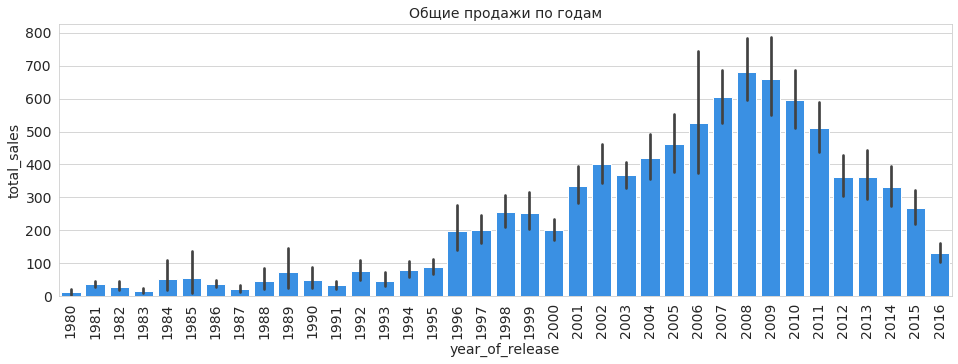

In [31]:
sns.set_style('whitegrid')
plt.figure(figsize=(16, 5))
sns.barplot(x='year_of_release', y='total_sales', data=games, estimator=sum, color = 'dodgerblue')
plt.title("Общие продажи по годам")
plt.xticks(rotation=90) 
plt.show()

По аналогии с графиком выхода новых игр видим резкое падение продаж после 2011 года.

*Составим список платформ (топ-10) с наибольшими суммарными продажами*

In [32]:
top_platform = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)
top_platform.reset_index()

,platform,total_sales
0,PS2,1250.92
1,X360,966.67
2,PS3,935.19
3,Wii,903.31
4,DS,804.28
5,PS,727.58
6,PS4,314.14
7,GBA,313.73
8,PSP,293.57
9,PC,258.86


*Создадим сводную таблицу c информацией по продажам в год среди самых популярных платформ*

In [33]:
platform_sales = games.query('platform in @top_platform.index')\
                .pivot_table(index=['year_of_release', 'platform'], values='total_sales', aggfunc='sum')
platform_sales = platform_sales.reset_index()
platform_sales.head()

,year_of_release,platform,total_sales
0,1985,DS,0.02
1,1985,PC,0.04
2,1988,PC,0.03
3,1992,PC,3.03
4,1994,PC,12.87


Посмотрим список уникальных платформ и в дальнейшем создадим словарь.

In [34]:
platform_sales.platform.unique()

array(['DS', 'PC', 'PS', 'GBA', 'PS2', 'PSP', 'PS3', 'X360', 'Wii', 'PS4'],
      dtype=object)

*Построим графики распределения продаж по годам*

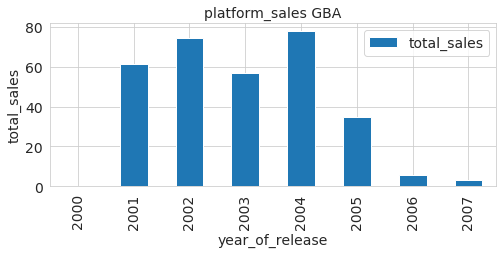

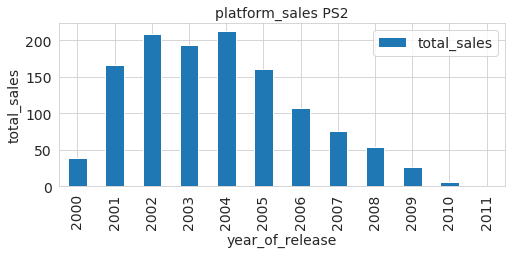

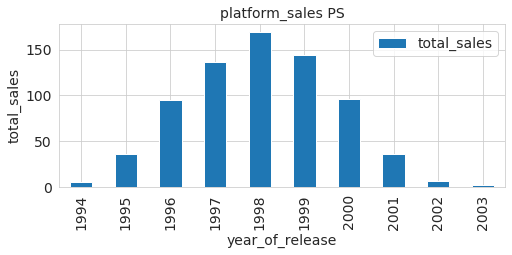

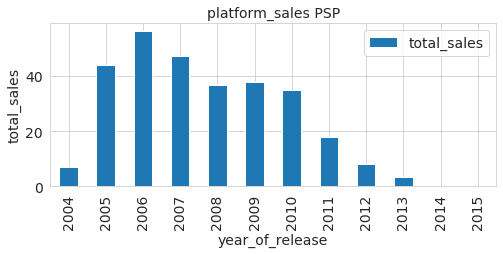

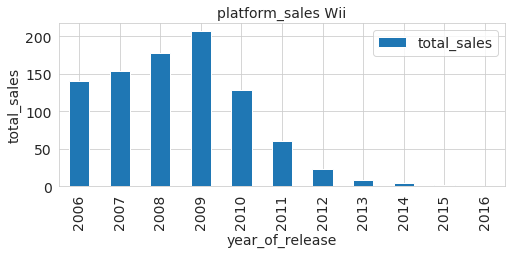

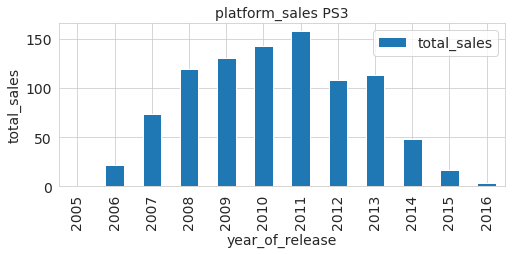

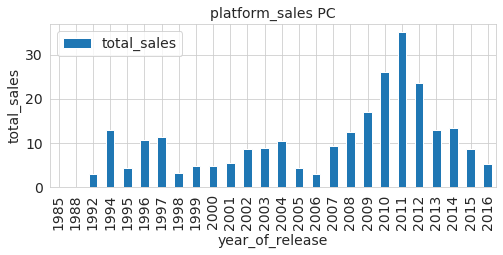

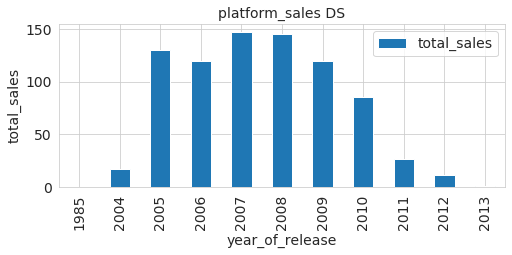

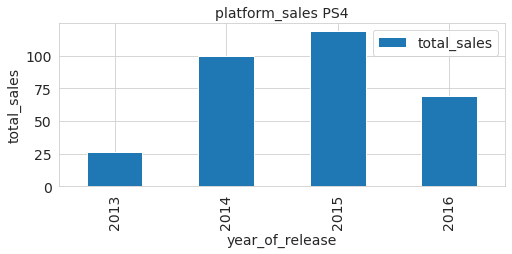

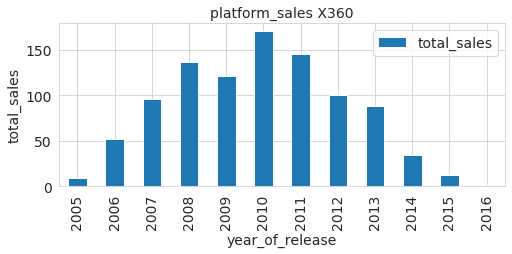

In [35]:
unique_platform = {'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', 'PC'}

for cat in unique_platform:
    
    platform_sales[(platform_sales['platform'] == cat)]\
    .plot(kind = 'bar', x = 'year_of_release' , y = 'total_sales', grid = True, figsize = (8, 3))

    plt.title('platform_sales ' + cat)
    plt.xlabel('year_of_release')
    plt.ylabel('total_sales')
    plt.show()

**Вывод**

Получив топ-10 платформ с самыми высокими продажами и построив графики распределения продаж по годам, можем сделать вывод, что средний срок жизни платформы составляет от 6 до 10 лет, при этом пик продаж приходится на 4-5 лет из общего жизненного цикла платформы.  
Для составления прогноза на 2017 год будут актуальны данные, начиная с 2012-2013 годов.

***
**3. Определение периода, по которому можно построить прогноз на 2017 год**

Для построения прогноза на 2017 год актуальными данными являются продажи, начиная с 2012 года по двум причинам:
1. Количество выпускаемых игр стабилизировались после резкого падения и начало небольшой рост;
2. Жизненный цикл игровых платформ составляет около 10 лет (с пиком на 5 год), поэтому более ранние данные теряют свою актуальность из-за устаревания платформ;

*Создадим новый датафрейм, удалив данные до 2012 года*

In [36]:
games_new = games.query('year_of_release > 2011')

In [37]:
print(games_new.info())
print()
print('Актуальные игровые платформы:')
print(games_new.platform.value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2899 entries, 16 to 16714
Data columns (total 14 columns):
name               2899 non-null object
platform           2899 non-null object
year_of_release    2899 non-null int64
genre              2899 non-null object
na_sales           2899 non-null float64
eu_sales           2899 non-null float64
jp_sales           2899 non-null float64
other_sales        2899 non-null float64
total_sales        2899 non-null float64
critic_score       1704 non-null float64
critic_id          2899 non-null int64
user_score         1815 non-null float64
user_id            2899 non-null int64
rating             2899 non-null object
dtypes: float64(7), int64(3), object(4)
memory usage: 339.7+ KB
None

Актуальные игровые платформы:
PS3     494
PSV     411
3DS     397
PS4     392
X360    294
PC      255
XOne    247
PSP     175
WiiU    147
Wii      55
DS       32
Name: platform, dtype: int64


В результате осталось 2899 строк, количество актуальных платформ сократилось до 11.

***
**4. Анализ платформ по актуальным данным и выбор наиболее перспективных**

Построим графики распределения общих продаж для каждой платформы по годам.

*Создадим сводную таблицу c информацией по продажам для разных платформ в год и посмотрим у каких платформ были максимальные продажи*

In [38]:
platform_sales_new = games_new.pivot_table(index=['year_of_release', 'platform'], values='total_sales', aggfunc='sum')
platform_sales_new = platform_sales_new.reset_index()
platform_sales_new.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index(name='sum')

,platform,sum
0,PS4,314.14
1,PS3,289.71
2,X360,237.52
3,3DS,195.01
4,XOne,159.32
5,WiiU,82.19
6,PC,63.51
7,PSV,49.18
8,Wii,36.60
9,DS,13.21


На первом месте по продажам, начиная с 2012 года идут платформы PS4 и PS3, затем X360, 3DS и на пятом месте XOne.

*Посмотрим список уникальных платформ и в дальнейшем создадим словарь.*

In [39]:
games_new.platform.unique()

array(['PS3', 'X360', 'PS4', '3DS', 'DS', 'XOne', 'WiiU', 'Wii', 'PC',
       'PSV', 'PSP'], dtype=object)

*Построим графики распределения продаж по годам*

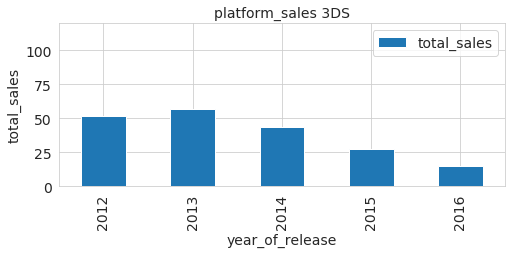

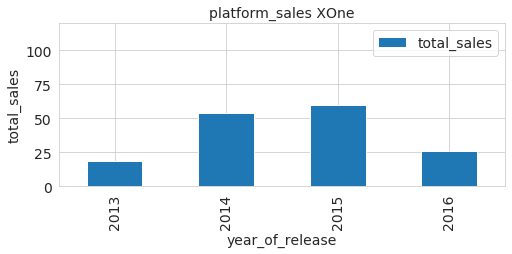

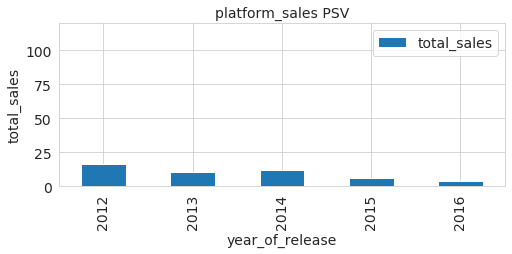

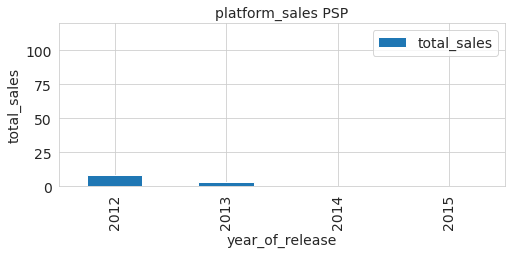

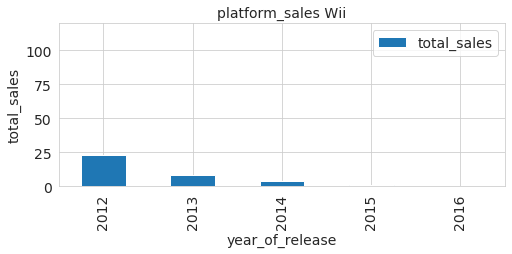

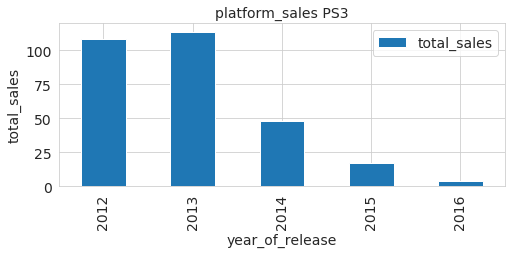

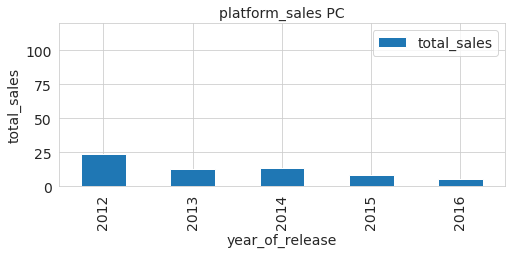

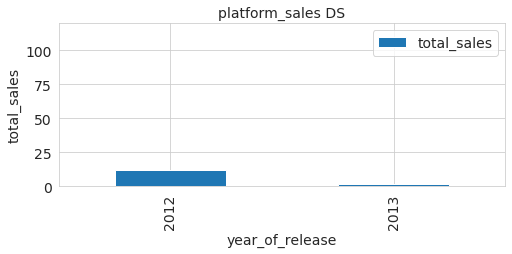

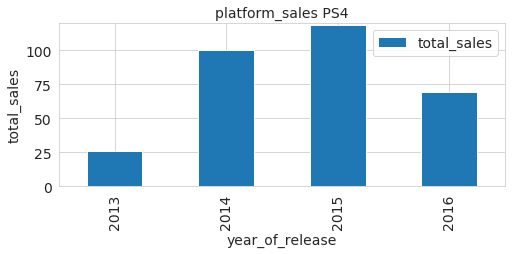

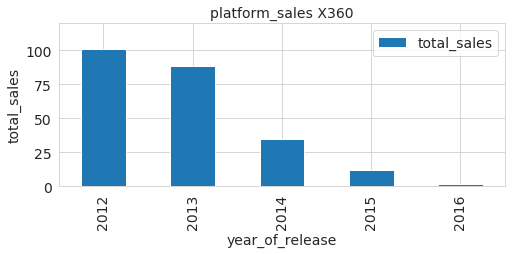

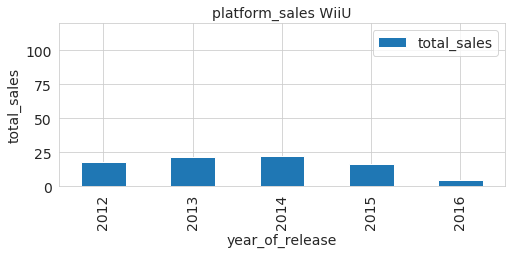

In [40]:
unique_platform_new = {'PS3', 'X360', 'PS4', '3DS', 'DS', 'XOne', 'WiiU', 'Wii', 'PC',
       'PSV', 'PSP'}

for cat in unique_platform_new:
    
    platform_sales_new[(platform_sales_new['platform'] == cat)]\
    .plot(kind = 'bar', x = 'year_of_release' , y = 'total_sales', ylim = (0, 120), grid = True, figsize = (8, 3))

    plt.title('platform_sales ' + cat)
    plt.xlabel('year_of_release')
    plt.ylabel('total_sales')
    plt.show()

* Лидером по продажам являются платформы PS4, XOne и Nintendo 3DS.  
* Продажи на платформах PS4 и XOne растут начиная с 2013 года, что объясняется их выходом в конце 2013 года.  
* Продажи игр для платформы 3DS, наоборот, падают начиная с 2013 года - это значит, что в ближайшие несколько лет можно ожидать ее ухода с рынка.  
* На одном уровне держатся продажи игр для PC, однако в количественном выражении они в разы меньше продаж для вышеперчисленных платформ.  
* Продажи на остальных платформах падают, что объясняется их постепенным уходом с рынка.

**Вывод**

Потенциально наиболее прибыльными в 2017 году платформами являются PS4 и XOne.  
Также не стоит упускать из виду платформы 3DS и WiiU, которые, несмотря на падение продаж в лидерах по их величине и PC, продажи которого одни из самых стабильных на рынке и не зависят от смены поколений платформы.

<p style="color:green">Всё верно</p>

***
**5. Есть ли разница продаж каждой игры на разных платформах?**

Изучим разницу в продажах игр на разных платформах и посмотрим, есть ли разница, насколько она велика, есть ли разница в средних продажах на разных платформах?

*Для начала отсортируем таблицу по убыванию общих продаж и посмотрим, какие игры оказались самыми популярными.*

In [41]:
games_new.groupby('name')['total_sales'].sum().sort_values(ascending=False).head(10)

name
Grand Theft Auto V                56.58
Call of Duty: Black Ops II        29.40
Call of Duty: Ghosts              27.39
Call of Duty: Black Ops 3         25.67
Minecraft                         24.16
Call of Duty: Advanced Warfare    21.97
FIFA 15                           17.37
FIFA 14                           16.46
FIFA 16                           16.30
FIFA Soccer 13                    15.97
Name: total_sales, dtype: float64

*Построим график по продажам пяти одних из самых популярных игр на разных платформах. Постараемся выбрать разные жанры.*

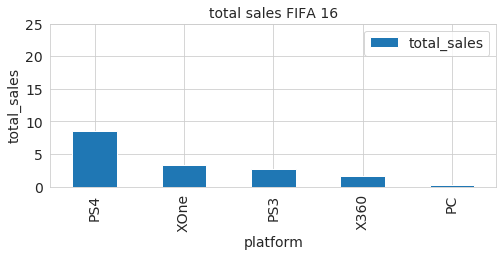

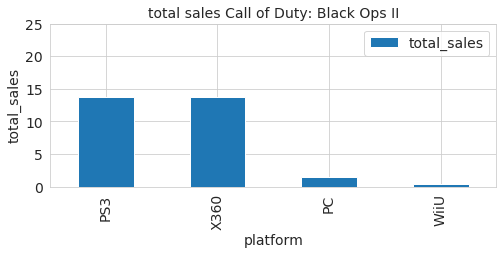

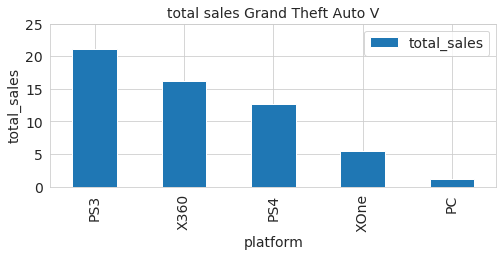

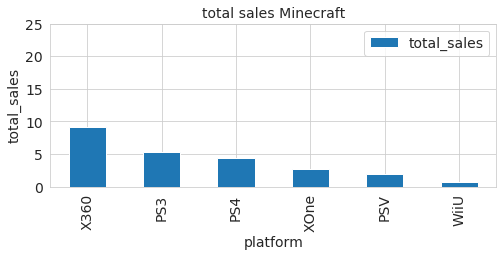

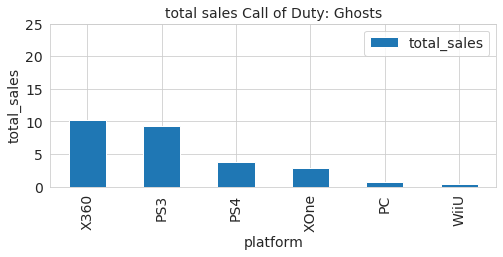

In [42]:
best_games = {'Grand Theft Auto V', 'Call of Duty: Black Ops II', 'Call of Duty: Ghosts', 'Minecraft', 'FIFA 16'}

for cat in best_games:
    
    games_new[(games_new['name'] == cat)]\
    .plot(kind = 'bar', x = 'platform' , y = 'total_sales', ylim = (0, 25), grid = True, figsize = (8, 3))

    plt.title('total sales ' + cat)
    plt.xlabel('platform')
    plt.ylabel('total_sales')
    plt.show()

Максимальные продажи у всех 5 игр на платформах PS и Xbox разных поколений даже у игры Minecraft, что достаточно неожиданно.  
Продажи на платформах-лидерах больше остальных платформ в несколько раз.
Дальше посмотрим обобщенные данные по всем продажам для каждой платформы.

***
*Построим график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам, убрав с графиков выбросы в виде небольшого количества самых популярных игр*

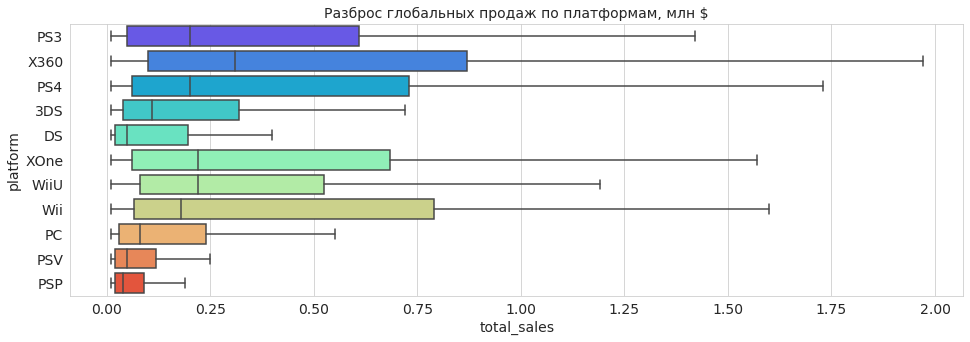

In [43]:
sns.set_style('whitegrid')
plt.figure(figsize=(16, 5))
sns.boxplot(x="total_sales", y="platform", data=games_new, palette='rainbow', orient='h', showfliers=False)
plt.title("Разброс глобальных продаж по платформам, млн $")
plt.show()

* По медианным данным о продажах платформы можно разделить на 2 группы, в каждой из которых медианы будут близки.  
В первую группу с более высокой медианой попадают платформы - PS3, Xbox360, PS4, XOne, WiiU и Wii. Во вторую - DS, PC, PSP, PSV. 
* Лидером по усредненным продажам является Xbox360, которая опередила даже PS3. Можно предположить, что это связано с большим количеством игр, которые выходили на PS3, следствием чего является больее количество плохих или небольших игр и, соответственно, уменюшением средних и медианных данных продаж.
* Максимальные продажи зафиксированы на платформе PS3 у игры Grand Theft Auto V.

*Проверим предположение о том, что на PS3 количетсво игр вышло больше, чем на X360*

In [44]:
games_new.groupby('platform')['name'].count().sort_values(ascending=False).head()

platform
PS3     494
PSV     411
3DS     397
PS4     392
X360    294
Name: name, dtype: int64

***
**6. Как влияют отзывы пользователей и критиков на продажи?**

Изучим, как влияют отзывы пользователей и критиков на продажи на примере современной платформы PS4.  
Предположительно оба рейтинга должны влиять на продажи, построим диаграммы рассеяния и посчитаем коэффициенты корреляции между общими продажами на платформе и отзывами пользователей и критиков.

*Создадим срезы, в которых отображены игры с заполненными оценками.*

In [45]:
critic_score_good = games_new.query('critic_id == 1')
user_score_good = games_new.query('user_id ==1')

*Построим диаграмму рассеяния между отзывами критиков и общими продажами и посчитаем коэффициент корреляции*

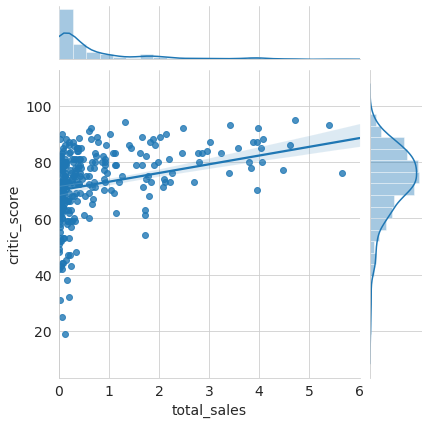

Корреляция между оценками критиков и общими продажами: 0.39


In [46]:
sns.jointplot(x = 'total_sales',y = 'critic_score', data = critic_score_good.
              query('platform == "PS4"'), kind = 'reg', xlim = (0, 6))
plt.show()
print('Корреляция между оценками критиков и общими продажами: {:.2f}'.
      format(critic_score_good.
              query('platform == "PS4"')['total_sales'].corr(critic_score_good.
              query('platform == "PS4"')['critic_score'])))

Диаграмма рассеяния и построенные параллельно гистограммы распределения показывают, что большая часть игр одинаково плохо, однако с ростом рейтинга критиков возрастает вероятность увеличения продаж, т.е. у игр с высоким рейтингом больше шансов стать популярными.  
Коэффициент корреляции составляет 0.39 и подтверждает данные графиков.

*Построим диаграмму рассеяния между отзывами пользователей и общими продажами и посчитаем коэффициент корреляции*

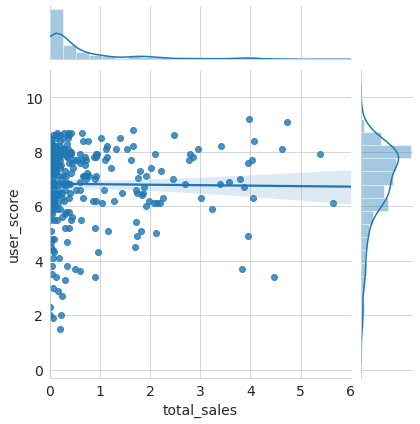

Корреляция между оценками критиков и общими продажами: -0.02


In [47]:
sns.jointplot(x = 'total_sales',y = 'user_score', data = user_score_good.
              query('platform == "PS4"'), kind = 'reg', xlim = (0, 6))
plt.show()
print('Корреляция между оценками критиков и общими продажами: {:.2f}'.
      format(critic_score_good.
              query('platform == "PS4"')['total_sales'].corr(user_score_good.
              query('platform == "PS4"')['user_score'])))

Из полученных графиков видно, что оценки пользователей не влияют на продажи игр, а продажи игр с высоким рейтингом в большинстве своем продаются также как и с низким.  
Коэффициент корреляции составляет -0.02 и подтверждает данные графиков.

***
*Сравним полученные значения с другими платформами*

Построим диаграмму рассеяния между отзывами критиков и общими продажами и посчитаем коэффициент корреляции

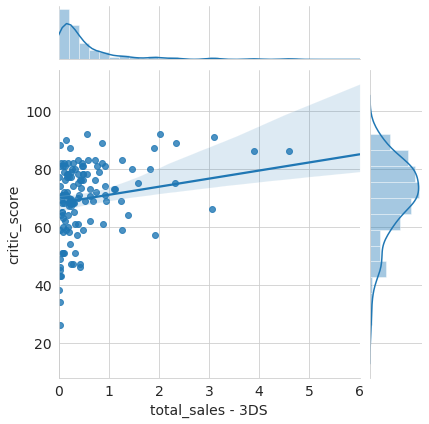

Корреляция между оценками пользователей и общими продажами: 0.29


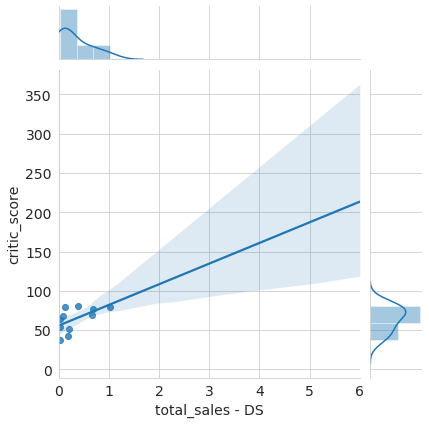

Корреляция между оценками пользователей и общими продажами: 0.56


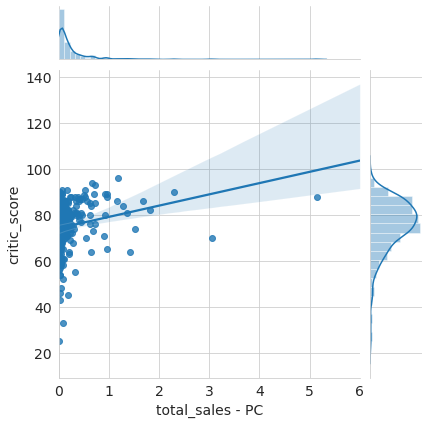

Корреляция между оценками пользователей и общими продажами: 0.24


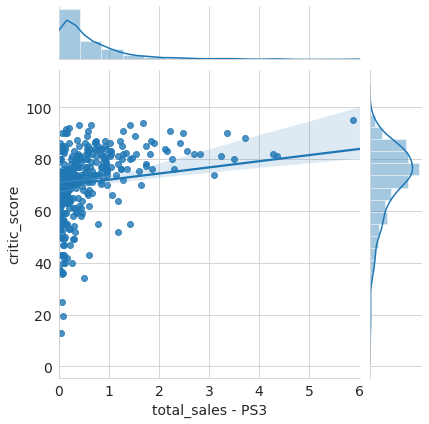

Корреляция между оценками пользователей и общими продажами: 0.31


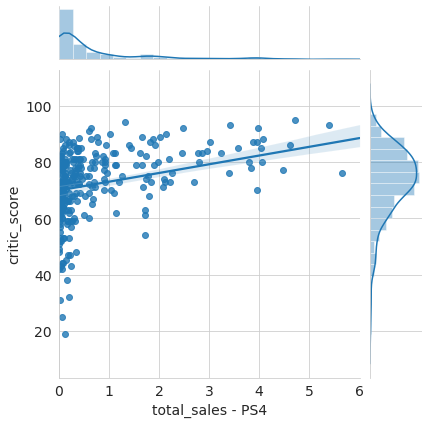

Корреляция между оценками пользователей и общими продажами: 0.39


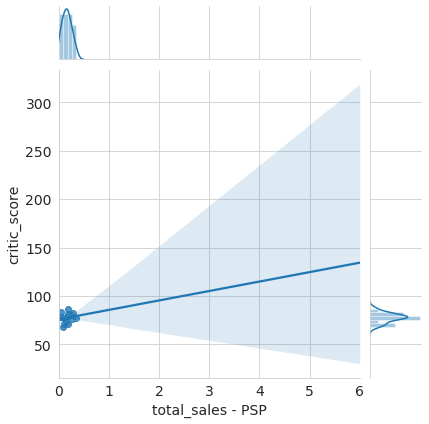

Корреляция между оценками пользователей и общими продажами: 0.18


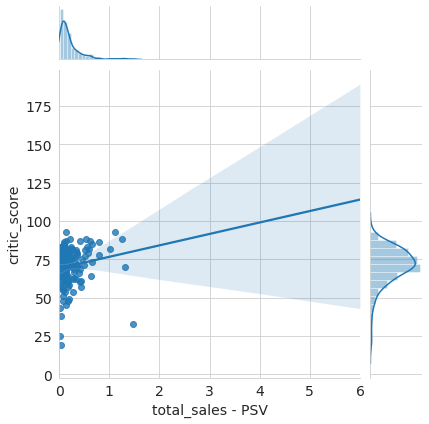

Корреляция между оценками пользователей и общими продажами: 0.16


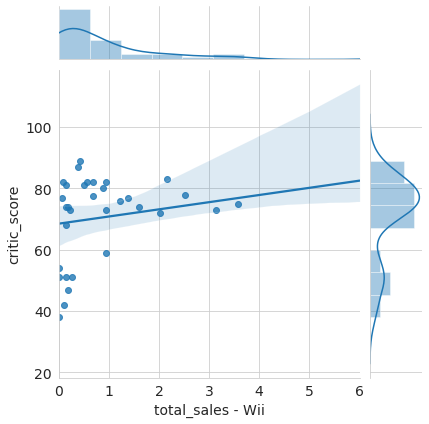

Корреляция между оценками пользователей и общими продажами: 0.24


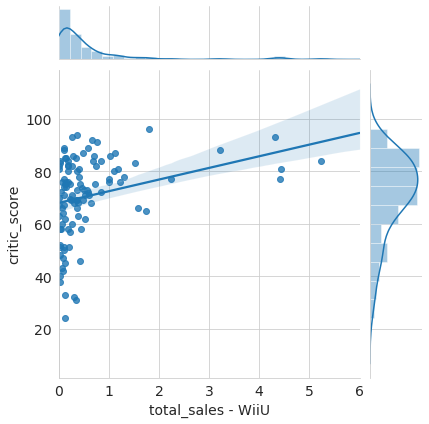

Корреляция между оценками пользователей и общими продажами: 0.32


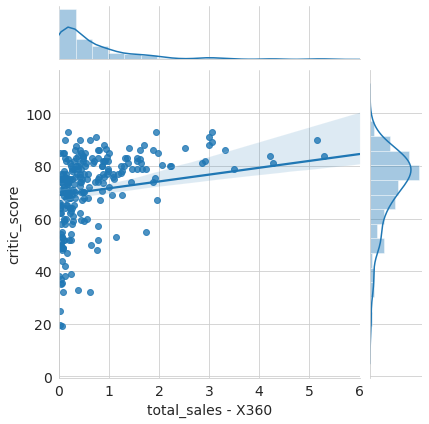

Корреляция между оценками пользователей и общими продажами: 0.32


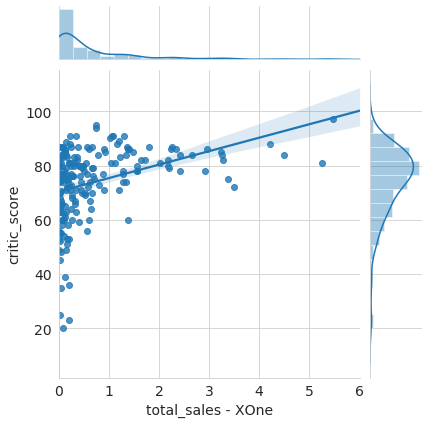

Корреляция между оценками пользователей и общими продажами: 0.37


In [48]:
for name, group_data in critic_score_good.groupby('platform'):
    
    sns.jointplot(x = 'total_sales',y = 'critic_score', data = group_data, kind = 'reg', )
    
    plt.xlabel('total_sales - ' + name)
    plt.ylabel('critic_score')
    sns.set_style('whitegrid')
    plt.show()
    
    print('Корреляция между оценками пользователей и общими продажами: {:.2f}'.
      format(critic_score_good[(critic_score_good['platform'] == name)]['total_sales'].
             corr(critic_score_good[(critic_score_good['platform'] == name)]['critic_score'])))

Как мы видим, отзывы критиков влияют на продажи на всех плафтормах, на каких-то меньше, на каких-то больше, но влияют.  
Посмотрим, как влияют отзывы пользоавтелей на продажи на разных платформах.

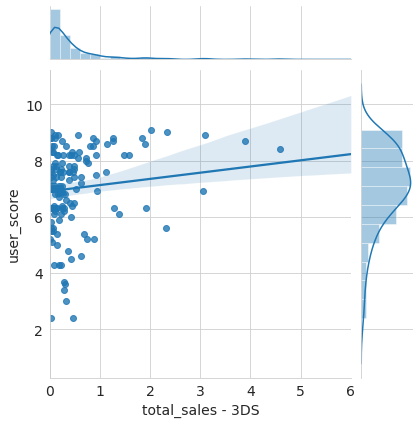

Корреляция между оценками пользователей и общими продажами: 0.20


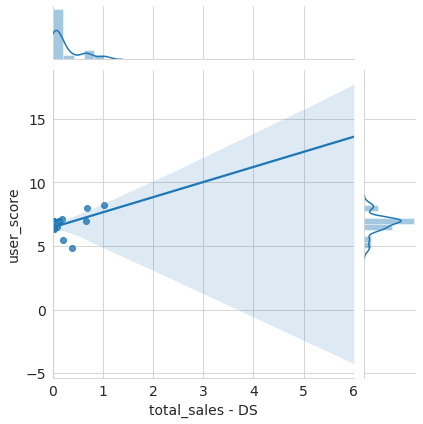

Корреляция между оценками пользователей и общими продажами: 0.44


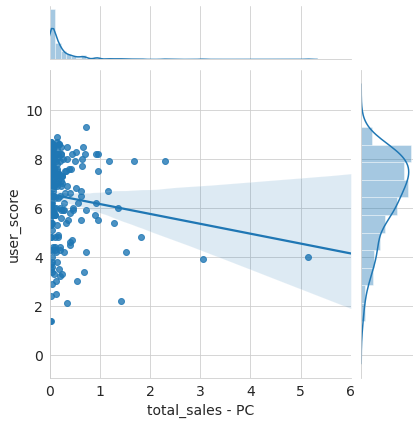

Корреляция между оценками пользователей и общими продажами: -0.13


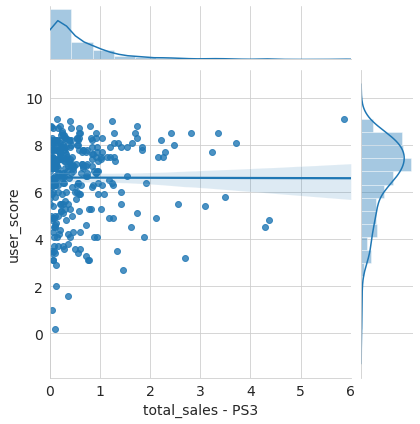

Корреляция между оценками пользователей и общими продажами: -0.01


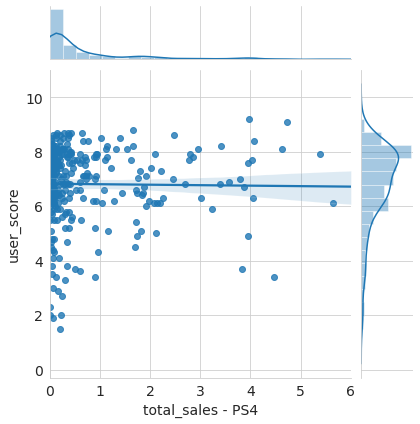

Корреляция между оценками пользователей и общими продажами: -0.02


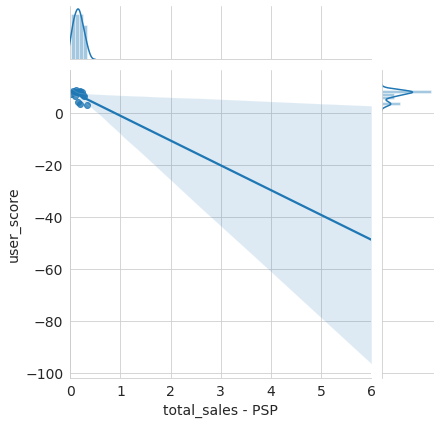

Корреляция между оценками пользователей и общими продажами: -0.47


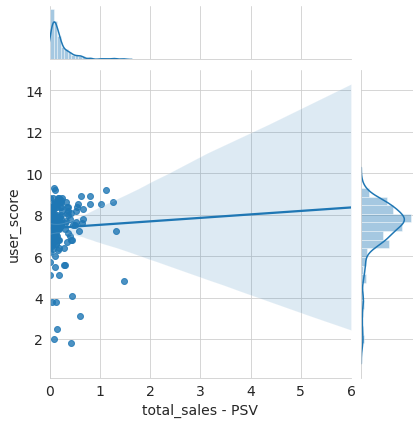

Корреляция между оценками пользователей и общими продажами: 0.03


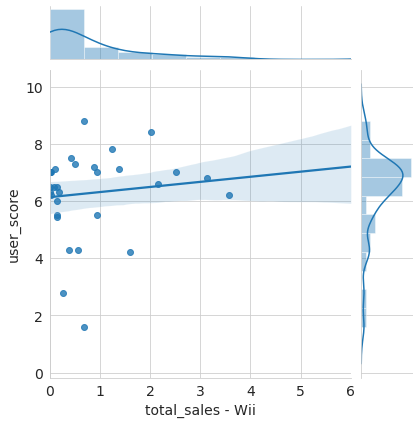

Корреляция между оценками пользователей и общими продажами: 0.17


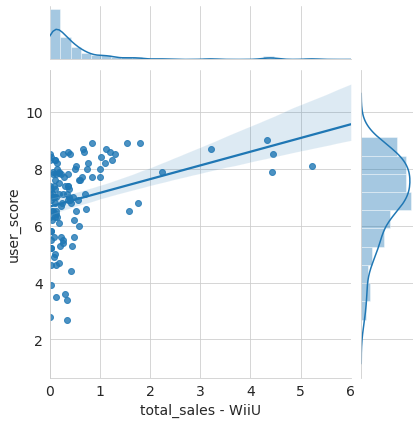

Корреляция между оценками пользователей и общими продажами: 0.38


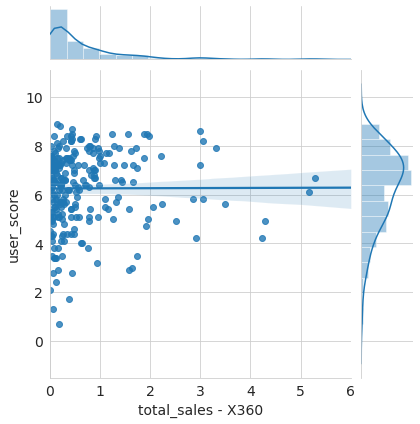

Корреляция между оценками пользователей и общими продажами: 0.01


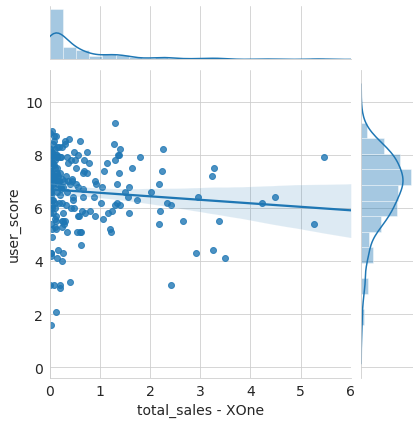

Корреляция между оценками пользователей и общими продажами: -0.09


In [49]:
for name, group_data in user_score_good.groupby('platform'):
    
    sns.jointplot(x = 'total_sales',y = 'user_score', data = group_data, kind = 'reg', xlim = (0, 6))
    
    plt.xlabel('total_sales - ' + name)
    plt.ylabel('user_score')
    sns.set_style('whitegrid')
    plt.show()
    
    print('Корреляция между оценками пользователей и общими продажами: {:.2f}'.
      format(user_score_good[(user_score_good['platform'] == name)]['total_sales'].
             corr(user_score_good[(user_score_good['platform'] == name)]['user_score'])))

Из всех платформ пользовательские оценки влияют на продажи игр на платформах WiiU, Wii, DS и 3DS. Все эти платформы выпускает компания Nintendo, видимо у этой компании лучше сформирована фан база и пользователи больше доверяют чужим оценкам.

**Вывод**

Оценки критиков сильнее влияют на продажи, чем оценки пользователей.   
Для платформ PS3, PS4, X360, XOne, PC оценки пользователей никак не не влияют на продажи.

***
**7. Анализ прибыльности разных жанров.**

*Посмотрим на общее распределение игр по жанрам.*

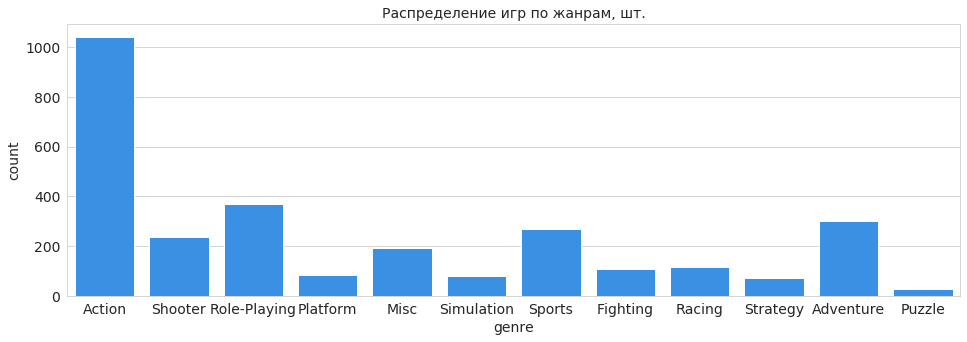

In [50]:
sns.set_style('whitegrid')
plt.figure(figsize=(16, 5))
sns.countplot(x='genre', data=games_new, color = 'dodgerblue')
plt.title("Распределение игр по жанрам, шт.")
plt.show()

По количеству выпущенных игр с большим отрывом лидирует жанр Action. В пятерку также входят Role-Playing, Adventure, Shooter и Sports.  

*Посмотрим игры каких жанров являются более прибыльными.*

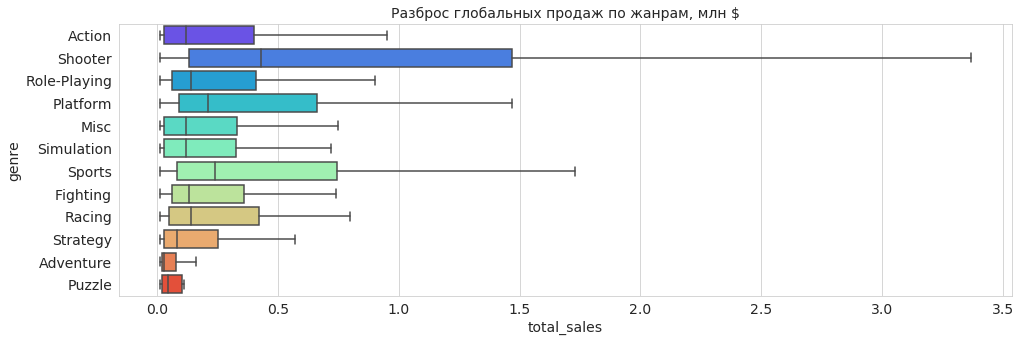

In [51]:
sns.set_style('whitegrid')
plt.figure(figsize=(16, 5))
sns.boxplot(x="total_sales", y="genre", data=games_new, palette='rainbow', orient='h', showfliers=False)
plt.title("Разброс глобальных продаж по жанрам, млн $")
plt.show()

* По медианным продажам самым прибыльным жанром является Shooter, затем идут Sports и Platform.
* Жанр Action при этом находится в нижней части списка. Это может быть следствием большого количества выпущенных игр.
* Наименее прибыльными жанрами являются Adventure и Puzzle.

***
## Вывод

В результате исследовательского анализа данных были сделаны слеующие выводы:
* Для анализа можно взять данные, начиная с 2012 года. Более старые данные не актуальны из-за смены поколений игровых платформ;
* Средний срок жизни платформ составляет около 10 лет, пик продаж приходится на 5-6 лет в середине жизненного цикла;  
* Самыми популярными платформами на данный момент являются PS4 и XOne. Также достаточно большие продажи у платформ 3DS и WiiU;
* Продажи для PC держатся на одном уровне и не зависят от смены платформ;
* Наиболее продаваемыми платформами являюся платформы PS3, PS4, X360, Xone. Чуть ниже располагаются Wii и WiiU;
* Оценки критиков влияют на продажи, а оценки пользователей нет. Исключение - платформы компании Nintendo WiiU, Wii, DS и 3DS;
* Самое большое количество игр выпускается в жанре Action. Самым прибыльным жанром является жанр Shooter;
* Жанр Platform входит в тройку по прибыльности, но находится в конце списка по количеству выпускаемых игр.

***
## Шаг 4. Составим портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
1. Самые популярные платформы (топ-5);
2. Самые популярные жанры (топ-5);
3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?

***
**1. Определим топ-5 самых популярных платформ для каждого региона**

*Построим таблицы топ-5 платформ по продажам для каждого региона.*

In [52]:
na_sales = games_new.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head().reset_index(name='counts')
eu_sales = games_new.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head().reset_index(name='counts')
jp_sales = games_new.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head().reset_index(name='counts')
other_sales = games_new.groupby('platform')['other_sales'].sum().sort_values(ascending=False).head().reset_index(name='counts')

*Создадим функцию и построим графики по полученным таблицам для каждого региона*

In [53]:
def pie_chart(data1, data2, data3, data4, labels1, labels2, labels3, labels4):
    fig, axes = plt.subplots(2, 2, figsize = (12, 12))
    labels = labels1
    sizes = data1['counts']
    explode = (0, 0, 0, 0, 0)  
    axes[0,0].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
    axes[0,0].set_title('North America')
    labels = labels2
    sizes = data2['counts']
    axes[0,1].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
    axes[0,1].set_title('Europe')
    labels = labels3
    sizes = data3['counts']
    axes[1,0].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
    axes[1,0].set_title('Japan')
    labels = labels4
    sizes = data4['counts']
    axes[1,1].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
    axes[1,1].set_title('Other')
    plt.show()

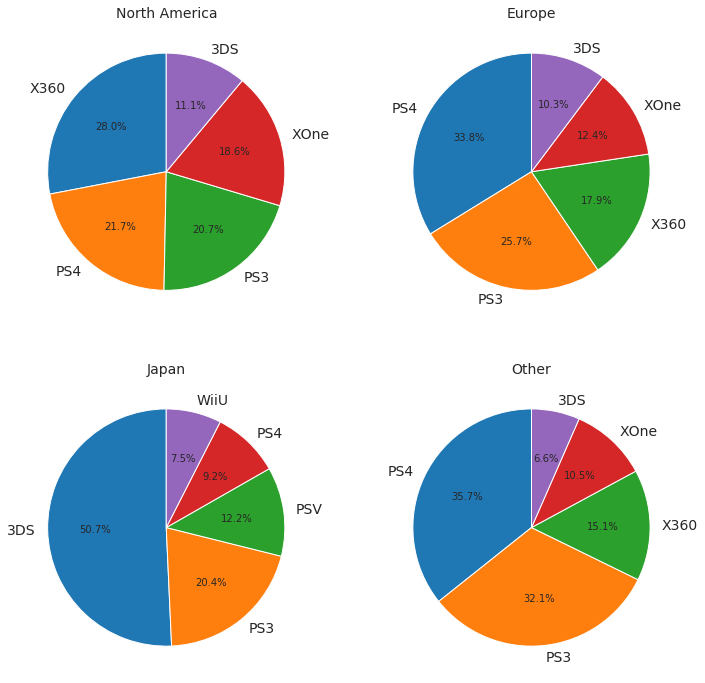

In [54]:
pie_chart(na_sales, eu_sales, jp_sales, other_sales, 
          na_sales.platform, eu_sales.platform, jp_sales.platform, other_sales.platform)

***
**Вывод**

В результате анализа полученных графиков можно сделать следующие выводы:
* В Северной Америке, в отличие от Европы и остального мира, плафтормы компании Xbox(X360 и XOne) более популярны, чем PS(PS3 и PS4). Это связано с тем, что Xbox выпускает американская компания Microsoft, а американский рынок является для них домашним;
* В Европе и в остальном мире распределение самых попуплярных платформ примерно одинаковое - лидер PS(PS3 и PS4);
* В Японии картина продаж кардинально отличается от других регионов - больше 50% продаж приходятся на платформу 3DS, а платформы Xbox не входят в пятерку самых популярных. Пятое место заняла платформа WiiU, не входящая в топ-5 в остальном мире. Из полученных данных можно сделать вывод, что в Японии намного сильнее, чем в остальном мире развит сегмент портативных игровых платформ. Также видно, что в Японии в топ-5 платформ входят только местные компании Play Station и Nintendo.

***
**2. Определим топ-5 самых популярных жанров для каждого региона**

*Построим таблицы топ-5 жанров по продажам для каждого региона.*

In [55]:
na_genre = games_new.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head().reset_index(name='counts')
eu_genre = games_new.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head().reset_index(name='counts')
jp_genre = games_new.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head().reset_index(name='counts')
other_genre = games_new.groupby('genre')['other_sales'].sum().sort_values(ascending=False).head().reset_index(name='counts')

*Построим графики по полученным таблицам для каждого региона*

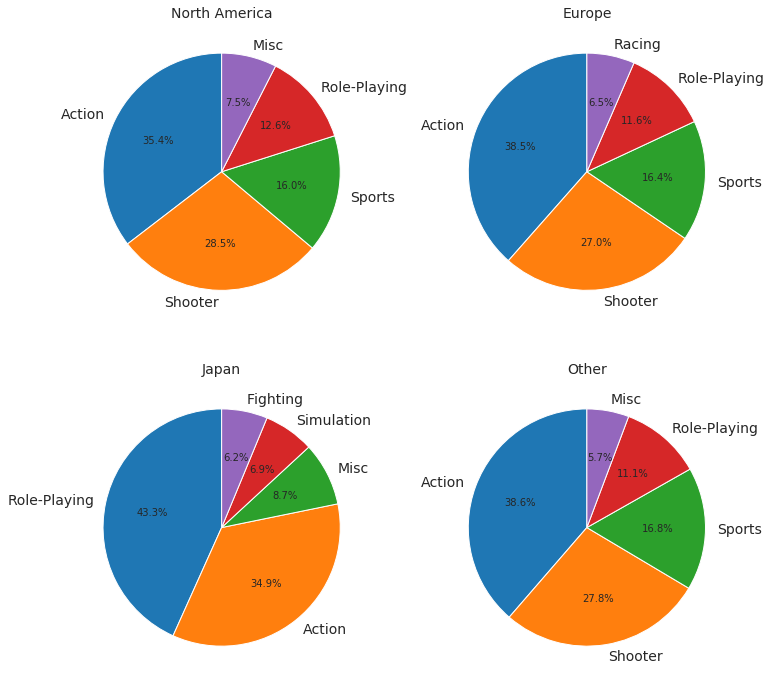

In [56]:
pie_chart(na_genre, eu_genre, jp_genre, other_genre, 
          na_genre.genre, eu_genre.genre, jp_genre.genre, other_genre.genre)

***
**Вывод**

В результате анализа полученных графиков можно сделать следующие выводы:

* В Северной Америке, Европе и остальном мире продажи по жанрам очень похожи. На первых 3 местах жанры - Action, Shooter, Sports. Отличия только в пятом месте - в Европе его занимает жанр Racing, в Северной Америке и остальных странах Misc.
* В Японии картина продаж кардинально отличается от других регионов - на первом месте продажи жанра Role-Playing. Жанр Action находится на втором месте и его доля продаж аналогична остальному миру. Жанр Sports отсутствует в топ-5, зато пятое место занял жанр Fighting.  

*** 
**3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

*Построим таблицы по продажам игр разного рейтинга для каждого региона.*

Специально оставляем игры с отсутствующим рейтингом (N/A).

In [57]:
na_rating = games_new.groupby('rating')['na_sales'].sum().sort_values(ascending=False).head().reset_index(name='counts')
eu_rating = games_new.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).head().reset_index(name='counts')
jp_rating = games_new.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).head().reset_index(name='counts')
other_rating = games_new.groupby('rating')['other_sales'].sum().sort_values(ascending=False).head().reset_index(name='counts')

*Построим графики по полученным таблицам для каждого региона*

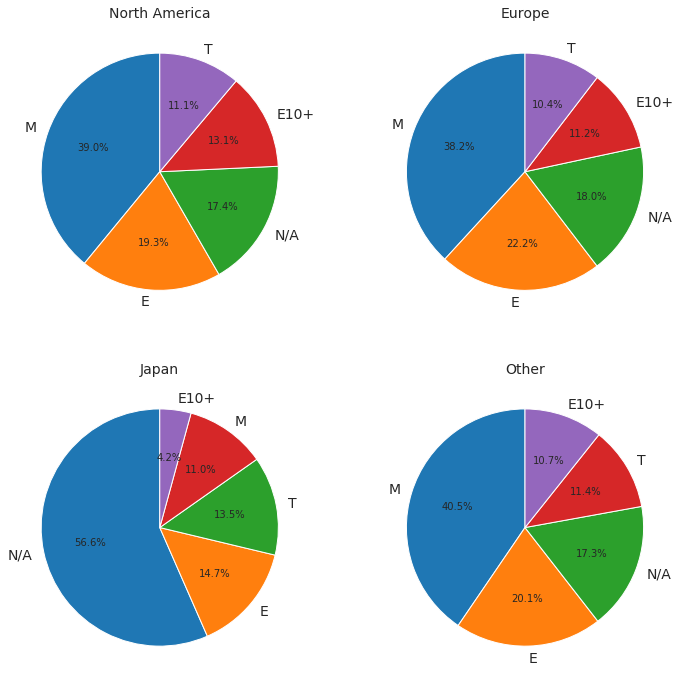

In [58]:
pie_chart(na_rating, eu_rating, jp_rating, other_rating, 
          na_rating.rating, eu_rating.rating, jp_rating.rating, other_rating.rating)

***
**Вывод**

Анализ графиков показывает, что:
* В Японии количество игр без рейтинга намного больше в процентном соотношении, чем в других регионах.  
Это означает, что в Японии продается много уникальных игр, которые не получали рейтинг по системе ESRB И не продавались в других странах;
* Различий в популярности игр с разным рейтингом в регионах North America, Europe, Other практически нет.  
На первом месте в рейтинге стоят игры  с рейтингом M, на втором E, далее E10+ и T;
* В Японии на первом месте игры с рейтингом E, далее T, только потом идут игры с рейтингом M и E10+.  

В результате можно сделать следующий вывод - рейтинг влияет на продажи игр, причем продажи игр в Японии сильно отличаются по своей структуре от отсального мира.

***
## Вывод

В результате проведенного анализа можно составить следующие наблюдения о поведении пользователей в разных регионах:
* Пользователи в Северной Америке больше предпочитают игры на платформах компании Xbox разных поколений, игры жанров Action, Shooter, Sports рейтинга M;
* В Европе пользователи похожи на пользователей Северной Америки с точки зрения любимых игровых жанров и рейтинга игр, но большинство продаж приходится на платформы PS3 и PS4. Платформы Xbox при этом находятся в пятерке самых популярных;
* Портрет пользователя в Японии очень сильно отличается от Европы и Северной Америки.  
В Японии в топ-5 самых популярных входят только местные платформы (PS и Nintendo), Xbox нет в топ-5 - самой популярной платформой является портативная 3DS.  
Самым популярным жанром является Role-Playing, а на пятое место попали игры Fighting.  
В Японии много локальных игр, которые не вышли на международный рынок и их продажи занимают больше половины рынка.  
Самыми популярными играми являются игры с рейтингом E и T. Рейтинг M только на 3 месте, не включая неопределенный.

**Резюмируя, портреты пользователей можно описать так:**  
* Северная Америка - старше 17 лет, предпочитает американские товары, любит играть дома, любит активные игры (Action, Shooter) и увлечен спортом;
* Европа - средний пользователь похож на американского за исключением того, что не привязан к стране производителю платформ;
* Япония - средний пользователь - школьник, который любит играть вне дома по пути в школу или в школе, любит японские игры и платформы, создавать своих персонажей в играх и ассоциировать себя с ними. Также больше остальных он предпочитает Fighting.

***
## Шаг 5. Проверка гипотез

Проверим две гипотезы:
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action и Sports разные.

***
**Гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

*В начале построим графики распределения пользовательских рейтингов платформ Xbox и PC*

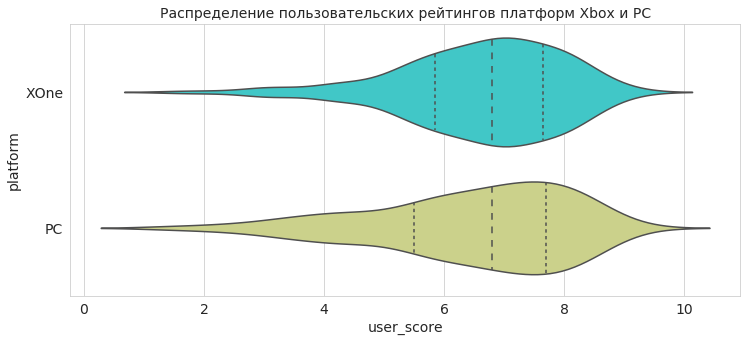

In [59]:
plt.figure(figsize=(12, 5))
sns.violinplot(x="user_score", y="platform", data=user_score_good, order=["XOne", "PC"], 
               palette='rainbow', orient='h', inner="quartile")
plt.title('Распределение пользовательских рейтингов платформ Xbox и PC')
plt.show()

Графики распределения очень похожи, медианные значения и третий квартиль пользовательских оценок находятся на примерно одном уровне, у оценок PC чуть ниже расположен первый квартиль.
Однако данные по продажам у нас не полные, проверим наши выводы со статистической точки зрения.  
Сформулируем нулевую гипотезу следующим образом - "Средние пользовательские рейтинги платформ Xbox One и PC равны".
Уровень статистической значимости установим равным 0.01, чтобы получить более точное подтверждение или опровержение гипотезы.

In [60]:
alpha = 0.01
results = st.ttest_ind(user_score_good.query('platform == "XOne"')['user_score'],
                       user_score_good.query('platform == "PC"')['user_score'], equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.27851980743235577
Не получилось отвергнуть нулевую гипотезу


***
**Вывод**  

Значение p-value оказалось выше уровня статистической значимости - около 12%.
Поэтому гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC равны отвергнуть нельзя.

***
**Гипотеза 2. Средние пользовательские рейтинги жанров Action и Sports разные**  

Теперь посмотрим, можно ли сказать, что средние пользовательские рейтинги жанров Action И Sports разные.

*Построим графики распределения пользовательских рейтингов жанров Acton и Sports*

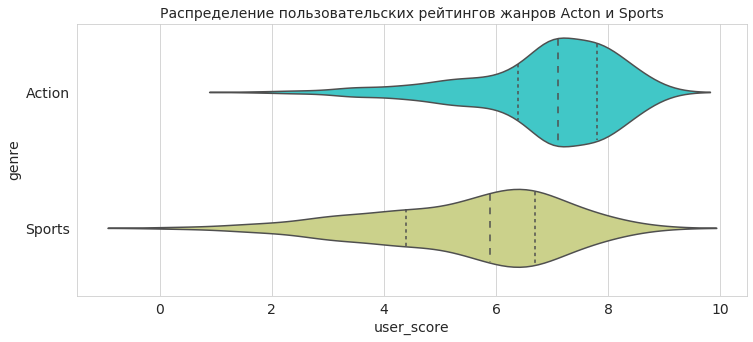

In [61]:
plt.figure(figsize=(12, 5))
sns.violinplot(x="user_score", y="genre", data=user_score_good, order=["Action", "Sports"], 
               palette='rainbow', orient='h', inner="quartile")
plt.title('Распределение пользовательских рейтингов жанров Acton и Sports')
plt.show()

Графики распределения сильно отличаются, медианные значения оценок жанра Action выше третьего квартиля оценок жанра Sports.
Из графиков распределения можно предположить, что средние пользовательские рейтинги жанров Action и Sports разные.
Проверим наши выводы со статистической точки зрения.  

Для этого сформулируем одностороннюю нулевую гипотезу следующим образом - "Средние пользовательские рейтинги жанров Action и Sports равны".
Уровень статистической значимости установим равным 0.01, чтобы получить более точное подтверждение или опровержение гипотезы.

In [62]:
alpha = .01

results = st.ttest_ind(user_score_good.query('genre == "Action"')['user_score'],
                       user_score_good.query('genre == "Sports"')['user_score'], equal_var = False)

print('p-значение: ', results.pvalue / 2)

if (results.pvalue / 2 < alpha) and (user_score_good.query('genre == "Action"')['user_score'].mean() > 
                                     user_score_good.query('genre == "Sports"')['user_score'].mean()):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  4.1760287978753525e-24
Отвергаем нулевую гипотезу


**Вывод**  

Значение p-value оказалось ниже уровня статистической значимости, поэтому гипотезу, что средние пользовательские рейтинги жанров Action и Sports равны, придется отвергнуть.  
Подтвердилась альтернативная гипотеза - Средние пользовательские рейтинги жанра Action выше средних жанра Sports.

***
## Шаг 6. Общий вывод

В результате проведенного анализа можно сделать следующие выводы:

*1. Комментарии по исследованию:* 
* Для анализа были взяты данные, начиная с 2012 года. Более старые данные не актуальны из-за смены поколений игровых платформ;

*2. Выводы по исследованию платформ:*
* Потенциально наиболее прибыльными в 2017 году платформами являются PS4 и XOne. Также не стоит упускать из виду платформы 3DS и WiiU, которые, очень популярны в Японии и также находятся в лидерах по продажам. 
* Продажи для PC держатся на одном уровне и не зависят от смены платформ;
* Наибольшие медианные продажи приходятся на платформы PS3, PS4, X360, Xone. Чуть ниже располагаются Wii и WiiU;
* Средний пользовательский рейтинг платформ XOne и PC равен.

*3. Выводы по исследованию игр*
* Оценки критиков влияют на продажи игр, а оценки пользователей нет. Исключение - игр для платформ от компании Nintendo - WiiU, Wii, DS и 3DS;
* Самое большое количество игр выпускается в жанре Action. Самым прибыльным жанром является жанр Shooter;
* Жанр Platform входит в тройку по прибыльности, но находится в конце списка по количеству выпускаемых игр;
* Средний пользовательский рейтинг игр жанра Action выше, чем у жанра Sports.

*4. Выводы по изучению портрета пользователей*
* Портреты пользователей в Северной Америке и Европе похожи, за исключением предпочтений в выборе игровой платформы - в Европе больше любят PS, в Америке Xbox.
* Наиболее популярные жанры в Европе и Америке это Action, Shooter и Sports. Наиболее популярный рейтинг - M.
* Портрет пользователя в Японии очень сильно отличается от Европы и Северной Америки:
    * В топ-5 самых популярных входят только местные платформы (PS и Nintendo), Xbox нет в топ-5 - самой популярной платформой является портативная 3DS.
    * Самым популярным жанром является Role-Playing, а на пятое место попали игры Fighting.
    * Много локальных игр, которые не вышли на международный рынок и их продажи занимают больше половины рынка.
    * Самыми популярными играми являются игры с рейтингом E и T. Рейтинг M только на 3 месте, не включая неопределенный.

*5. Обобщенные портреты пользователей*
* Северная Америка - старше 17 лет, предпочитает американские товары, любит играть дома, любит активные игры (Action, Shooter) и увлечен спортом;
* Европа - средний пользователь похож на американского за исключением того, что не привязан к стране производителю платформ;
* Япония - средний пользователь - школьник, который любит играть вне дома по пути в школу или в школе, любит японские игры и платформы, создавать своих персонажей в играх и ассоциировать себя с ними. Также больше остальных он предпочитает Fighting.

*6. Резюме*

Основными критериями, определяющими успешность игры во всем мире в 2017 году будут:
* Игра выпущена для платформ PS4 и XOne, при локализации в Японии стоит подумать о выпуске игры для портативных платформ;
* Игра должна быть жанра Shooter, Platform или Sports. Жанр Action популярен среди пользователей, но его медианные продажи ниже перечисленных ранее.
* Рейтинг игры для Северной Америки и Европы должен быть обозначен, как М. При выпуске игры в Японии стоит подумать о снижении рейтинга до E.